# GROUPT 21 APPLICATION INVOLVING EDGE ENHANCEMENT
# OULTINE - 
### - Sobel Operator Implementation
### - Prewitt's Operator Implementation
### - Laplacian Operator Implementation
### - Canny Operator Implementation
### - Unsharp Masking Operator Implementation
### - Detecting Water Bodies In Satellite Images Using Unsharp Masking
RATOR

# SOBEL OPERATOR 
##### The sobel is one of the most commonly used edge detectors. It is based on convolving the image with a small, separable, and integer valued filter in horizontal and vertical direction. Sobel edge enhancement filter has the advantage of providing differentiating (which gives the edge response) and smoothing (which reduces noise) concurrently.

##### Below is the code from scratch using matrixes G [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]  # s2 vertical = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])  # s1


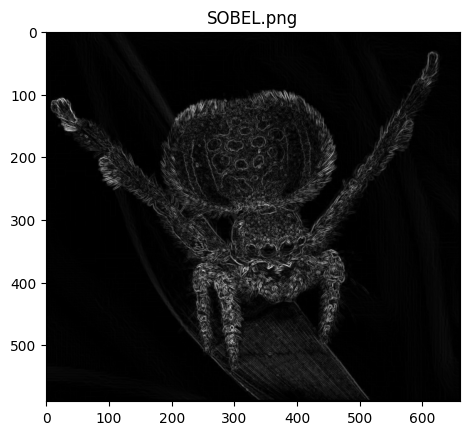

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Open the image
img = np.array(Image.open("operators_test_Image.jpg")).astype(np.uint8)

# Apply gray scale
gray_img = np.round(0.299 * img[:, :, 0] +
                    0.587 * img[:, :, 1] +
                    0.114 * img[:, :, 2]).astype(np.uint8)

# Sobel Operator
h, w = gray_img.shape
# define filters
horizontal = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])  # s2
vertical = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])  # s1

# define images with 0s
newhorizontalImage = np.zeros((h, w))
newverticalImage = np.zeros((h, w))
newgradientImage = np.zeros((h, w))

# offset by 1
for i in range(1, h - 1):
    for j in range(1, w - 1):
        horizontalGrad = (horizontal[0, 0] * gray_img[i - 1, j - 1]) + \
                         (horizontal[0, 1] * gray_img[i - 1, j]) + \
                         (horizontal[0, 2] * gray_img[i - 1, j + 1]) + \
                         (horizontal[1, 0] * gray_img[i, j - 1]) + \
                         (horizontal[1, 1] * gray_img[i, j]) + \
                         (horizontal[1, 2] * gray_img[i, j + 1]) + \
                         (horizontal[2, 0] * gray_img[i + 1, j - 1]) + \
                         (horizontal[2, 1] * gray_img[i + 1, j]) + \
                         (horizontal[2, 2] * gray_img[i + 1, j + 1])

        newhorizontalImage[i - 1, j - 1] = abs(horizontalGrad)

        verticalGrad = (vertical[0, 0] * gray_img[i - 1, j - 1]) + \
                       (vertical[0, 1] * gray_img[i - 1, j]) + \
                       (vertical[0, 2] * gray_img[i - 1, j + 1]) + \
                       (vertical[1, 0] * gray_img[i, j - 1]) + \
                       (vertical[1, 1] * gray_img[i, j]) + \
                       (vertical[1, 2] * gray_img[i, j + 1]) + \
                       (vertical[2, 0] * gray_img[i + 1, j - 1]) + \
                       (vertical[2, 1] * gray_img[i + 1, j]) + \
                       (vertical[2, 2] * gray_img[i + 1, j + 1])

        newverticalImage[i - 1, j - 1] = abs(verticalGrad)

        # Edge Magnitude
        mag = np.sqrt(pow(horizontalGrad, 2.0) + pow(verticalGrad, 2.0))
        newgradientImage[i - 1, j - 1] = mag

plt.figure()
plt.title('SOBEL.png')
plt.imshow(newgradientImage, cmap='gray')
plt.show()

We apply the mask on each RGB channel.

# Prewitt’s Operator
##### Prewitt operator is similar to the Sobel operator and is used for detecting vertical and horizontal edges in images. However, unlike the Sobel, this operator does not place any emphasis on the pixels that are closer to the center of the mask.# 

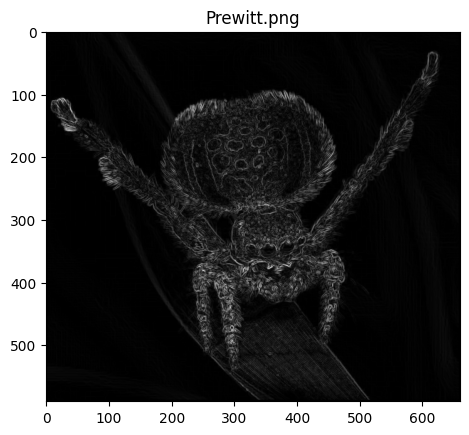

In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Open the image
img = np.array(Image.open('operators_test_Image.jpg')).astype(np.uint8)

# Apply gray scale
gray_img = np.round(0.299 * img[:, :, 0] +
                    0.587 * img[:, :, 1] +
                    0.114 * img[:, :, 2]).astype(np.uint8)

# Prewitt Operator
h, w = gray_img.shape
# define filters
horizontal = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])  # s2
vertical = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])  # s1

# define images with 0s
newgradientImage = np.zeros((h, w))

# offset by 1
for i in range(1, h - 1):
    for j in range(1, w - 1):
        horizontalGrad = (horizontal[0, 0] * gray_img[i - 1, j - 1]) + \
                         (horizontal[0, 1] * gray_img[i - 1, j]) + \
                         (horizontal[0, 2] * gray_img[i - 1, j + 1]) + \
                         (horizontal[1, 0] * gray_img[i, j - 1]) + \
                         (horizontal[1, 1] * gray_img[i, j]) + \
                         (horizontal[1, 2] * gray_img[i, j + 1]) + \
                         (horizontal[2, 0] * gray_img[i + 1, j - 1]) + \
                         (horizontal[2, 1] * gray_img[i + 1, j]) + \
                         (horizontal[2, 2] * gray_img[i + 1, j + 1])

        verticalGrad = (vertical[0, 0] * gray_img[i - 1, j - 1]) + \
                       (vertical[0, 1] * gray_img[i - 1, j]) + \
                       (vertical[0, 2] * gray_img[i - 1, j + 1]) + \
                       (vertical[1, 0] * gray_img[i, j - 1]) + \
                       (vertical[1, 1] * gray_img[i, j]) + \
                       (vertical[1, 2] * gray_img[i, j + 1]) + \
                       (vertical[2, 0] * gray_img[i + 1, j - 1]) + \
                       (vertical[2, 1] * gray_img[i + 1, j]) + \
                       (vertical[2, 2] * gray_img[i + 1, j + 1])

        # Edge Magnitude
        mag = np.sqrt(pow(horizontalGrad, 2.0) + pow(verticalGrad, 2.0))
        newgradientImage[i - 1, j - 1] = mag


plt.figure()
plt.title('Prewitt.png')
plt.imshow(newgradientImage, cmap='gray')
plt.show()

# Laplacian Operator (LOG)
##### The LoG filter combines Gaussian smoothing with the Laplacian operator. First, it smooths the image to reduce noise and then uses the Laplacian to detect edges

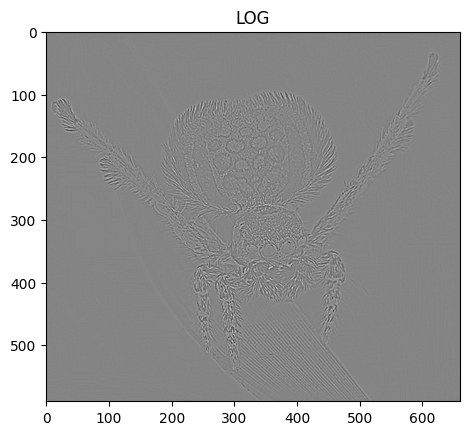

In [3]:
import cv2
import matplotlib.pyplot as plt

# Open the image
img = cv2.imread('operators_test_Image.jpg')

# Apply gray scale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply gaussian blur
blur_img = cv2.GaussianBlur(gray_img, (3, 3), 0)

# Positive Laplacian Operator
laplacian = cv2.Laplacian(blur_img, cv2.CV_64F)

plt.figure()
plt.title('LOG')
plt.imshow(laplacian, cmap='gray')
plt.show()

# Canny Operator
##### The Canny method is a multi-step algorithm designed for robust edge detection. It involves:
Smoothing with a Gaussian filter,
Computing gradients,
Applying non-maximum suppression (to thin edges),
And double thresholding to connect edges.


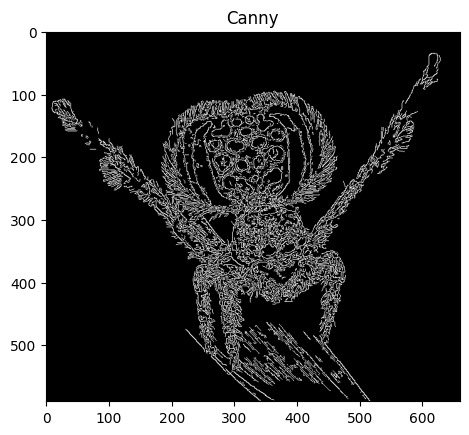

In [4]:
import cv2
import matplotlib.pyplot as plt

# Open the image
img = cv2.imread('operators_test_Image.jpg')

# Apply Canny
edges = cv2.Canny(img, 100, 200, 3, L2gradient=True)

plt.figure()
plt.title('Canny')
plt.imshow(edges, cmap='gray')
plt.show()

# Unsharp  Masking Operator

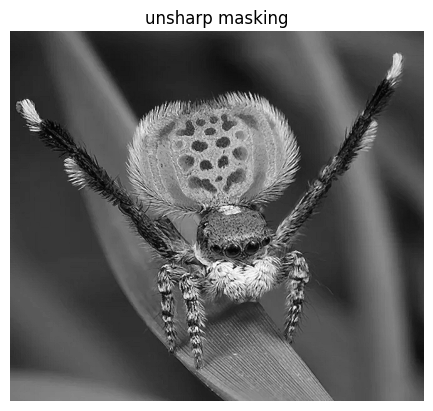

In [5]:
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter
import numpy as np

# Load the image
original_image = plt.imread('operators_test_Image.jpg')

# Convert to grayscale
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Median filtering (using a kernel size of 3)
gray_image_mf = median_filter(gray_image, size=3)

# Calculate the Laplacian
lap = cv2.Laplacian(gray_image_mf, cv2.CV_64F)

# Calculate the sharpened image
sharp = cv2.convertScaleAbs(gray_image - 0.7 * lap)

# Display the sharpened image
plt.figure()
plt.title('unsharp masking')
plt.imshow(sharp, cmap='gray')
plt.axis('off')  # Hide the axis
plt.show()

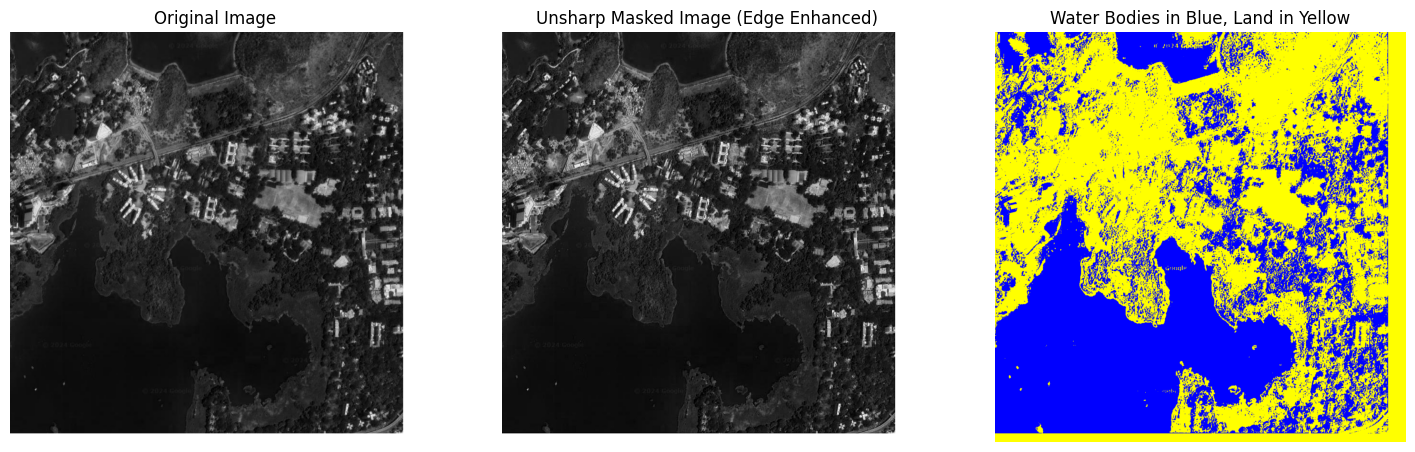

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import rasterio

# Load the satellite TIFF image
image_path = "image2.tif"
with rasterio.open(image_path) as src:
    image = src.read(1)  # Load the first band if single-band; adjust if different

# Normalize the image for better contrast
image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Apply Unsharp Masking for Edge Enhancement
# Generate a blurred version of the image
blurred = cv2.GaussianBlur(image, (9, 9), 10)
# Perform unsharp masking
unsharp_image = cv2.addWeighted(image, 1.5, blurred, -0.5, 0)

# Thresholding to detect water bodies
# Adjust threshold for best results with your image
_, water_mask = cv2.threshold(unsharp_image, 30, 255, cv2.THRESH_BINARY_INV)

# Create a color version of the image
colored_image = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)

# Assign blue color (water bodies) and yellow color (non-water areas)
colored_image[water_mask == 255] = [255, 0, 0]  # Blue for water (RGB format)
colored_image[water_mask == 0] = [0, 255, 255]  # Yellow for land (RGB format)

# Convert BGR to RGB for correct color display in matplotlib
colored_image_rgb = cv2.cvtColor(colored_image, cv2.COLOR_BGR2RGB)

# Plot original, enhanced, and final colored image
plt.figure(figsize=(18, 6))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Unsharp Masked Image
plt.subplot(1, 3, 2)
plt.imshow(unsharp_image, cmap='gray')
plt.title('Unsharp Masked Image (Edge Enhanced)')
plt.axis('off')

# Final Colored Image
plt.subplot(1, 3, 3)
plt.imshow(colored_image_rgb)
plt.title('Water Bodies in Blue, Land in Yellow')
plt.axis('off')

plt.show()


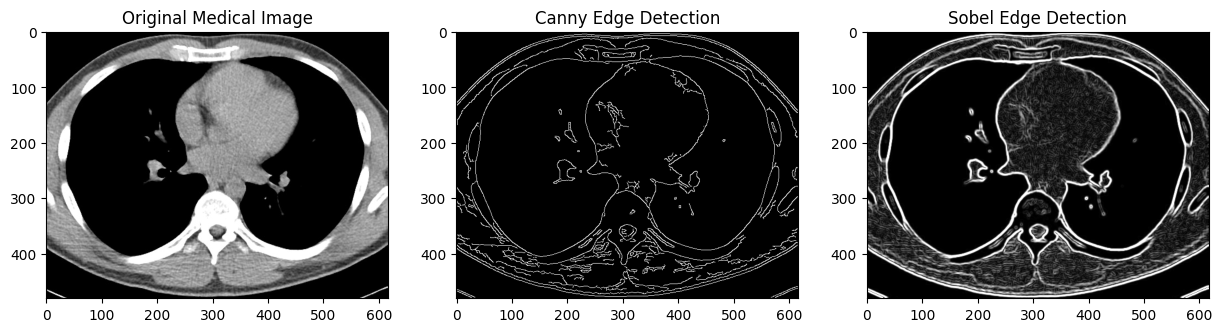

In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the medical image (e.g., CT scan, MRI image)
image = cv2.imread('medical.png', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian Blur to reduce noise before edge detection
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Edge Detection using the Canny method
# Adjust these thresholds as needed for medical imaging
canny_edges = cv2.Canny(blurred_image, threshold1=50, threshold2=150)

# Edge Detection using the Sobel method
sobel_x = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_edges = cv2.magnitude(sobel_x, sobel_y)

# Convert Sobel edges to 8-bit for display
sobel_edges = cv2.convertScaleAbs(sobel_edges)

# Display results
plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.title('Original Medical Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Canny Edge Detection')
plt.imshow(canny_edges, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Sobel Edge Detection')
plt.imshow(sobel_edges, cmap='gray')

plt.show()

In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# medical image (e.g., CT scan, MRI image)
image = cv2.imread('chest_xray.jpg', cv2.IMREAD_GRAYSCALE)

# Median filtering (using a kernel size of 3)
gray_image_mf = median_filter(image, size=3)

# Calculating the Laplacian
lap = cv2.Laplacian(gray_image_mf, cv2.CV_64F)

# Calculatingl the sharpened image
sharp = cv2.convertScaleAbs(gray_image - 1.0 * lap)

# Edge Detection using the Sobel method
sobel_x = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_edges = cv2.magnitude(sobel_x, sobel_y)

# Convert Sobel edges to 8-bit for display
sobel_edges = cv2.convertScaleAbs(sobel_edges)

# results
plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.title('Original Medical Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Sobel Edge Detection')
plt.imshow(sobel_edges, cmap='gray')
plt.subplot(1,3,2)
plt.title('unsharp masking')
plt.imshow(sharp, cmap='gray')
plt.show()

ValueError: operands could not be broadcast together with shapes (590,660) (400,399) 

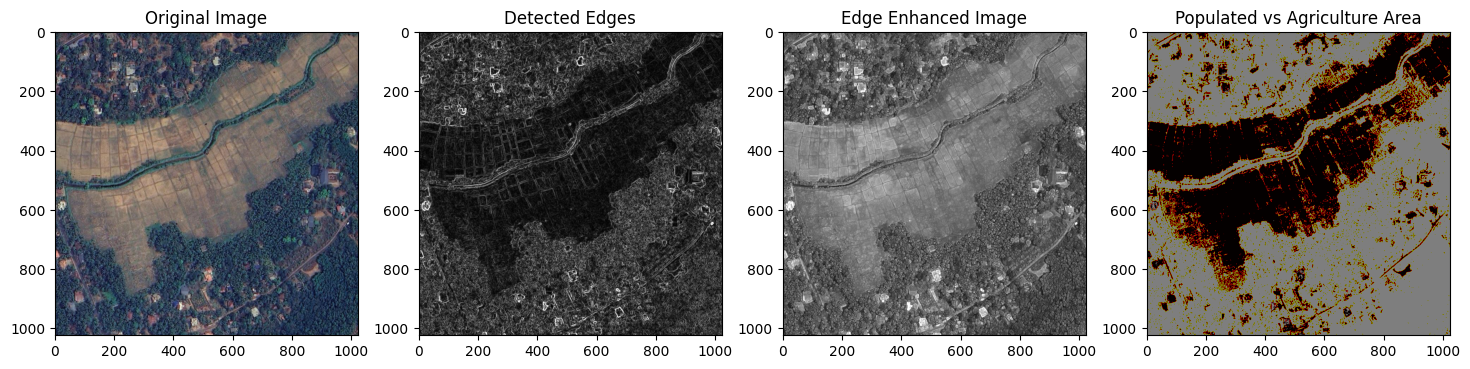

In [13]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread('agriculture.tif')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Converting the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Applying Gaussian Blur to reduce noise
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Perform edge detection using the Sobel operator
sobel_x = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=3)
edges = cv2.magnitude(sobel_x, sobel_y)

# Scaling edges to the 0-255 range for display
edges = cv2.convertScaleAbs(edges)

# Segmenting the image using a binary threshold to separate bright regions (likely populated areas) from darker regions
# Threshold values may need adjusting based on image characteristics
_, populated_area = cv2.threshold(gray_image, 180, 255, cv2.THRESH_BINARY)
_, agriculture_area = cv2.threshold(gray_image, 100, 180, cv2.THRESH_BINARY_INV)

# Enhancing edges by adding them back to the original grayscale image
alpha = 1.0  # original image weight
beta = 0.5   # edge image weight
enhanced_image = cv2.addWeighted(gray_image, alpha, edges, beta, 0)

# output
plt.figure(figsize=(18, 10))

plt.subplot(1, 4, 1)
plt.title('Original Image')
plt.imshow(image_rgb)

plt.subplot(1, 4, 2)
plt.title('Detected Edges')
plt.imshow(edges, cmap='gray')

plt.subplot(1, 4, 3)
plt.title('Edge Enhanced Image')
plt.imshow(enhanced_image, cmap='gray')

plt.subplot(1, 4, 4)
plt.title('Populated vs Agriculture Area')
plt.imshow(populated_area, cmap='gray')
plt.imshow(agriculture_area, cmap='hot', alpha=0.5)

plt.show()
